## Wavelet Transformation
1. WaveLet Function
    - The time scale and width of frequency domain of wavelet function.<br>
    Suppose the two wavelet function if given: 1. Morlet and DoG(m=2).If<br>
    you see the Time is wide in Morlet, but in Dog is samll. Similarly, The<br>
    Frequency doamin for Morlet is small where the Dog is big.<br>
    see the $\Phi(\frac{t}{s})$ and $\bar{\Phi}(s\omega)$.
    
2. Choice of scales:
    - $s$ is scale.
    - $s_{j}=2^{j\delta j}$, j=0 1...J.
    - $J=\delta j^{-1} \log_{2}(N \delta t/s_0) $
        - $s_0$ is smallest resolvable scale. This should be chosen.<br>
        So that it is equivalent fourier period is approximately 2*$\delta t$
        - J is determines the largest scale. 
        - The choice of a sufficiently small $\delta j$ depends in the width in spectral space<br>
        wave let function. For example Morlet is $\delta j=0.5$ which is the largest value that still<br>
        gives you adequate sampling in scale.
        - smaller value of  $\delta j$ gives you finer resolation.
3. Example
    -N=506<br>
    -dt=1/4# yr<br>
    -s0=2*dt # it should be equivalent fourier period<br>
    -dj=0.125 # The choice of smallest dj depands on the width in spectral space of wavelet Funtion or Shi.<br>
    -J=57<br>
    -j=np.arange(0,J,1)<br>
    -s=s0* 2**(j*dj)<br>
    J=(1/dj)*np.log2((N*dt)/(s0))<br>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
###-----
from scipy import interpolate
import utils as data_utils
from scipy.signal import welch
from scipy.fftpack import fftfreq, fft,rfftfreq,rfft,fftshift
import FeatureExtraction as Features


In [2]:
def norm(x):
    return x#/np.amax(abs(x), axis=-1, keepdims=True)

In [3]:
Freq=np.arange(0.06,0.36,0.01)*1e3
Brust=5/(Freq*1e-3)
Fss=2
#------------------# velocity calculated
Velocity=pd.read_csv('EnergyVelocity.txt', skiprows=4, delimiter=';')
Freq_velocity=np.linspace(0.05,0.4,500)*1e3
print(Velocity.shape)
Velo_A0=Velocity[Velocity.keys()[1]]
fA0 = interpolate.interp1d(Freq_velocity, Velo_A0)(Freq)

(500, 3)


### Experiment data

In [4]:
Exp_P=np.load('E:\Work\Work\POD_Analysis\POD_DATA\Experiment\Exp_Hole_DATA.npy')
Exp_D=np.load('E:\Work\Work\POD_Analysis\POD_DATA\Experiment\Exp_CRACKLENGTH_DATA.npy')
Exp_T=np.load('E:\Work\Work\POD_Analysis\POD_DATA\Experiment\Exp_TimeVector.npy')
Exp_CL=np.load('E:\Work\Work\POD_Analysis\POD_DATA\Experiment\Exp_CrackLengthInput.npy')
Nend=327
Exp_T_w_row=Exp_T[:Nend]
Exp_P_w_row=data_utils.window_Matrix_function(Exp_P[...,:Nend],Brust,fA0,Fss) # Number of Time domain
Exp_D_w_row=data_utils.window_Matrix_function(Exp_D[...,:Nend],Brust,fA0,Fss)
Exp=Features.FeatureExteraction(Exp_T_w_row,norm(Exp_P_w_row),norm(Exp_D_w_row))

6
6
6
6


### Simulation data

In [5]:
simFrequency=100
index=np.argmin(abs(Freq-simFrequency))
print("Simulation Excitation frequency is =",Freq[index])
Sim_P=np.load('E:\Work\Work\POD_Analysis\POD_DATA\Simulation\Sim_Hole_DATA.npy')
Sim_D=np.load('E:\Work\Work\POD_Analysis\POD_DATA\Simulation\Sim_CRACKLENGTH_DATA.npy')
Sim_T=np.load('E:\Work\Work\POD_Analysis\POD_DATA\Simulation\Sim_TimeVector.npy').T
Sim_CL=np.load('E:\Work\Work\POD_Analysis\POD_DATA\Simulation\Sim_CrackLengthInput.npy')
Sim_P_w_row=data_utils.window_Matrix_function(Sim_P,[Brust[index]],[fA0[index]],Fss) # Number of Time domain
Sim_D_w_row=data_utils.window_Matrix_function(Sim_D,[Brust[index]],[fA0[index]],Fss)
Sim=Features.FeatureExteraction(Sim_T,norm(Sim_P_w_row),norm(Sim_D_w_row))
Sim_T.shape

Simulation Excitation frequency is = 99.99999999999997
6
6
6
6


(299, 1)

# Maximum Damage Index acesses by 


In [6]:
### Maximum sim
Exp.Maximum_Amplitude()
Sim.Maximum_Amplitude()
###----
Exp.fft_Damage_Index()
Sim.fft_Damage_Index()
###--
Exp.wavelet_trans_Damage_Index(index=4)
Sim.wavelet_trans_Damage_Index(index=0) # this will take time because of the data points

#---
Exp.psd_Damage_Index()
Sim.psd_Damage_Index()


DimMA=(30, 21, 12, 4, 4, 1)
DimMA=(1, 20, 99, 4, 4, 1)
DimFFT=(30, 21, 12, 4, 4, 1)
DimFFT=(1, 20, 99, 4, 4, 1)
Dim_CWT=(25, 21, 12, 4, 4, 327)

 we are taking the sum axis=0 and axis=-1 for Damage Index
Dim_Sum_DamageIndex_CWT=(21, 12, 4, 4)
Dim_CWT=(24, 20, 99, 4, 4, 299)

 we are taking the sum axis=0 and axis=-1 for Damage Index
Dim_Sum_DamageIndex_CWT=(20, 99, 4, 4)
DimPSD=(30, 21, 12, 4, 4, 1)
DimPSD=(1, 20, 99, 4, 4, 1)


(25, 21, 12, 4, 4, 327)


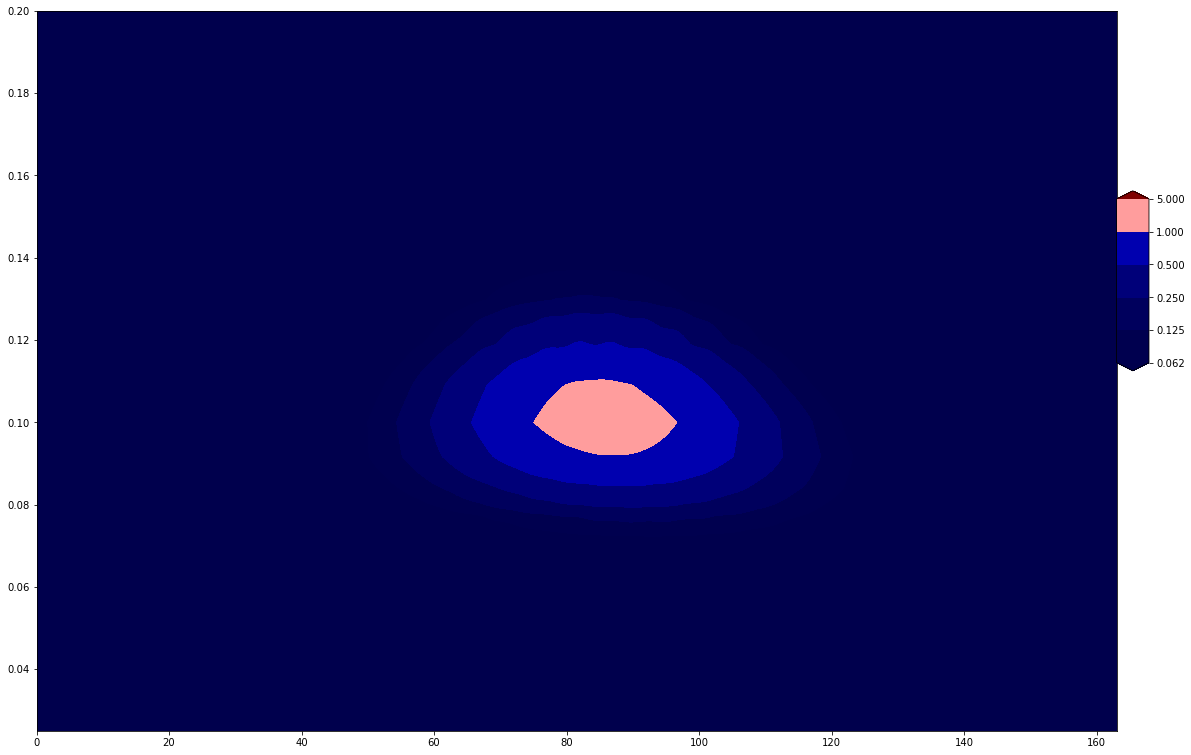

In [7]:
print(Exp.CWT.shape)
Exp.get_plot_wavelet(Exp.CWT[:,20,10,2,3,:],Exp.cwt_Freq)

(24, 20, 99, 4, 4, 299)
29.76


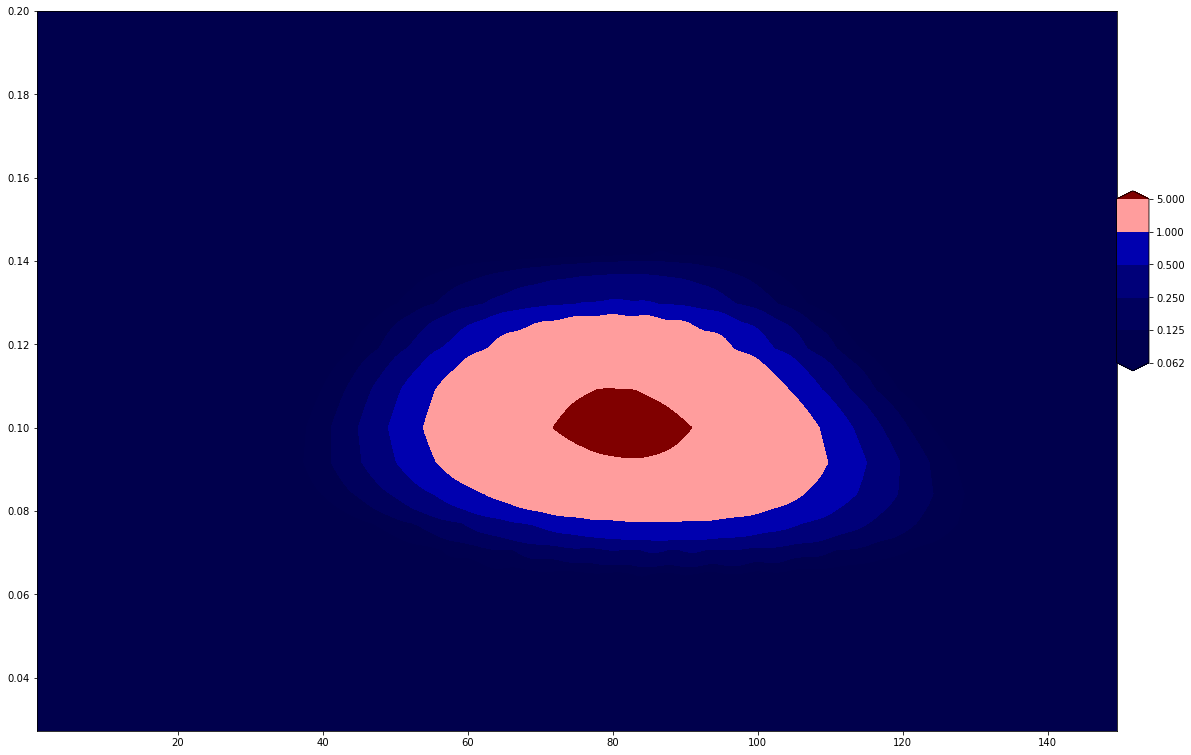

In [8]:
print(Sim.CWT.shape)
print(Sim_CL[19,10])
Sim.get_plot_wavelet(Sim.CWT[:,19,10,0,1,:],Sim.cwt_Freq)

(0.0, 500.0)

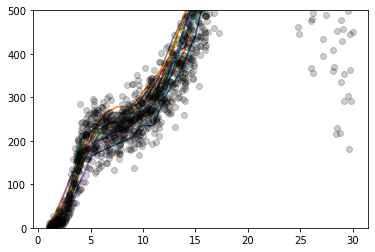

In [9]:
plt.figure()
plt.plot(Exp_CL,Exp.sum_CWT[:,:,0,1])
plt.plot(Sim_CL,Sim.sum_CWT[:,:,0,1], linestyle='None', marker='o', alpha=0.2, c='k')
plt.ylim(0,500)


In [25]:
extract=((Sim_CL>0) & (Sim_CL<20))
extract=extract

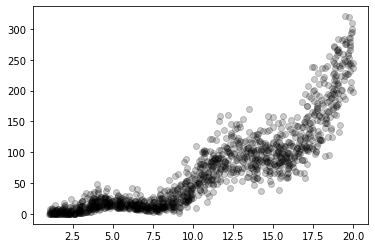

In [29]:
plt.figure()
# plt.plot(Exp_CL,Exp.sum_CWT[:,:,0,1])
plt.plot(Sim_CL[extract],Sim.sum_CWT[extract,2,3], linestyle='None', marker='o', alpha=0.2, c='k')
# plt.ylim(0,500)